<a href="https://colab.research.google.com/github/Saul-M/Deep-Learning-Class/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Deep Learning Final Project
# This notebook contains the steps to preprocess, explore, and model the dataset on student grades.

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [4]:
# Load the dataset
file_path = 'StudentGradesAndPrograms.csv'  # Update the path to the dataset if needed
data = pd.read_csv(file_path)

# Display basic information
print("Dataset Info:")
print(data.info())
print("\nFirst Few Rows:")
print(data.head())


<ipython-input-4-8393787ea1d6>:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200994 entries, 0 to 200993
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   schoolyear       200994 non-null  object 
 1   gradeLevel       200994 non-null  object 
 2   classPeriod      200994 non-null  object 
 3   classType        200994 non-null  object 
 4   schoolName       200994 non-null  object 
 5   gradePercentage  200994 non-null  float64
 6   avid             200994 non-null  object 
 7   sped             200994 non-null  object 
 8   migrant          200994 non-null  object 
 9   ell              200994 non-null  object 
 10  student_ID       200994 non-null  object 
dtypes: float64(1), object(10)
memory usage: 16.9+ MB
None

First Few Rows:
  schoolyear gradeLevel classPeriod classType        schoolName  \
0  2024-2025         07           1       ELE  West Junior High   
1  2024-2025         07           1       ELE  West Ju

In [5]:
# Data Cleaning and Exploration
print("\nSummary of 'gradePercentage':")
print(data['gradePercentage'].describe())

# Check unique values in categorical columns
binary_columns = ['avid', 'sped', 'migrant', 'ell']
for col in binary_columns:
    print(f"Unique values in {col}: {data[col].unique()}")

# Remove gradePercentage outliers above 100
cleaned_data = data[data['gradePercentage'] <= 100].copy()

# Encode binary columns as 1 (Y) and 0 (N)
for col in binary_columns:
    cleaned_data[col] = cleaned_data[col].map({'Y': 1, 'N': 0})


Summary of 'gradePercentage':
count    200994.000000
mean         81.183078
std          24.594533
min           0.000000
25%          72.800000
50%          88.500000
75%          97.900000
max        2000.000000
Name: gradePercentage, dtype: float64
Unique values in avid: ['Y' 'N']
Unique values in sped: ['N' 'Y']
Unique values in migrant: ['N' 'Y']
Unique values in ell: ['N' 'Y']



Summary of 'gradePercentage' after cleaning:
count    197741.000000
mean         80.686545
std          22.340228
min           0.000000
25%          72.500000
50%          88.000000
75%          97.500000
max         100.000000
Name: gradePercentage, dtype: float64
Rows removed: 3253

Missing Values After Cleaning:
schoolyear         0
gradeLevel         0
classPeriod        0
classType          0
schoolName         0
gradePercentage    0
avid               0
sped               0
migrant            0
ell                0
student_ID         0
dtype: int64

Data Types After Encoding:
schoolyear          object
gradeLevel          object
classPeriod         object
classType           object
schoolName          object
gradePercentage    float64
avid                 int64
sped                 int64
migrant              int64
ell                  int64
student_ID          object
dtype: object
Cleaned dataset saved.


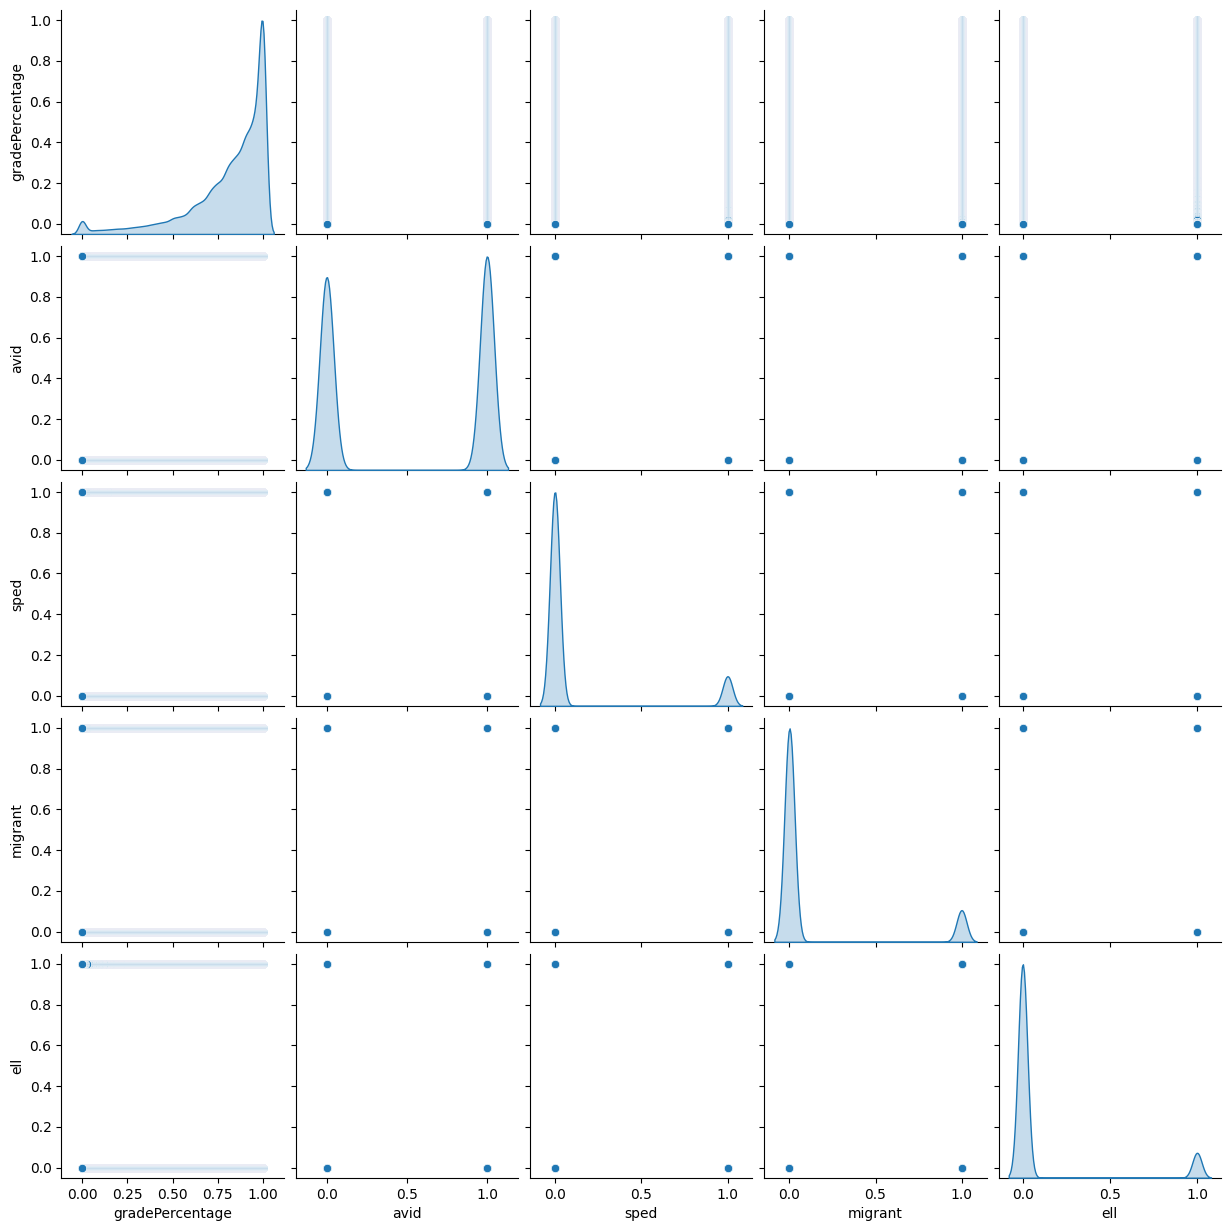

In [9]:
# Validation after cleaning
print("\nSummary of 'gradePercentage' after cleaning:")
print(cleaned_data['gradePercentage'].describe())
print(f"Rows removed: {len(data) - len(cleaned_data)}")
print("\nMissing Values After Cleaning:")
print(cleaned_data.isnull().sum())
print("\nData Types After Encoding:")
print(cleaned_data.dtypes)

# Scale 'gradePercentage'
scaler = MinMaxScaler()
cleaned_data['gradePercentage'] = scaler.fit_transform(cleaned_data[['gradePercentage']])

# Save cleaned data
cleaned_data.to_csv("Cleaned_StudentGrades.csv", index=False)
print("Cleaned dataset saved.")

# Explore relationships between features
sns.pairplot(cleaned_data, diag_kind="kde")
plt.show()

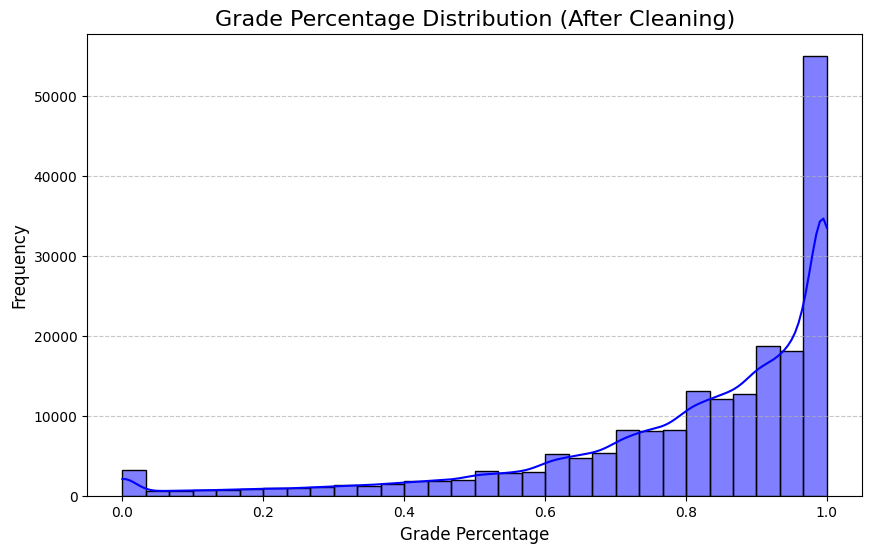

In [10]:
# Visualize gradePercentage distribution after cleaning
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['gradePercentage'], bins=30, kde=True, color='blue')
plt.title("Grade Percentage Distribution (After Cleaning)", fontsize=16)
plt.xlabel("Grade Percentage", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

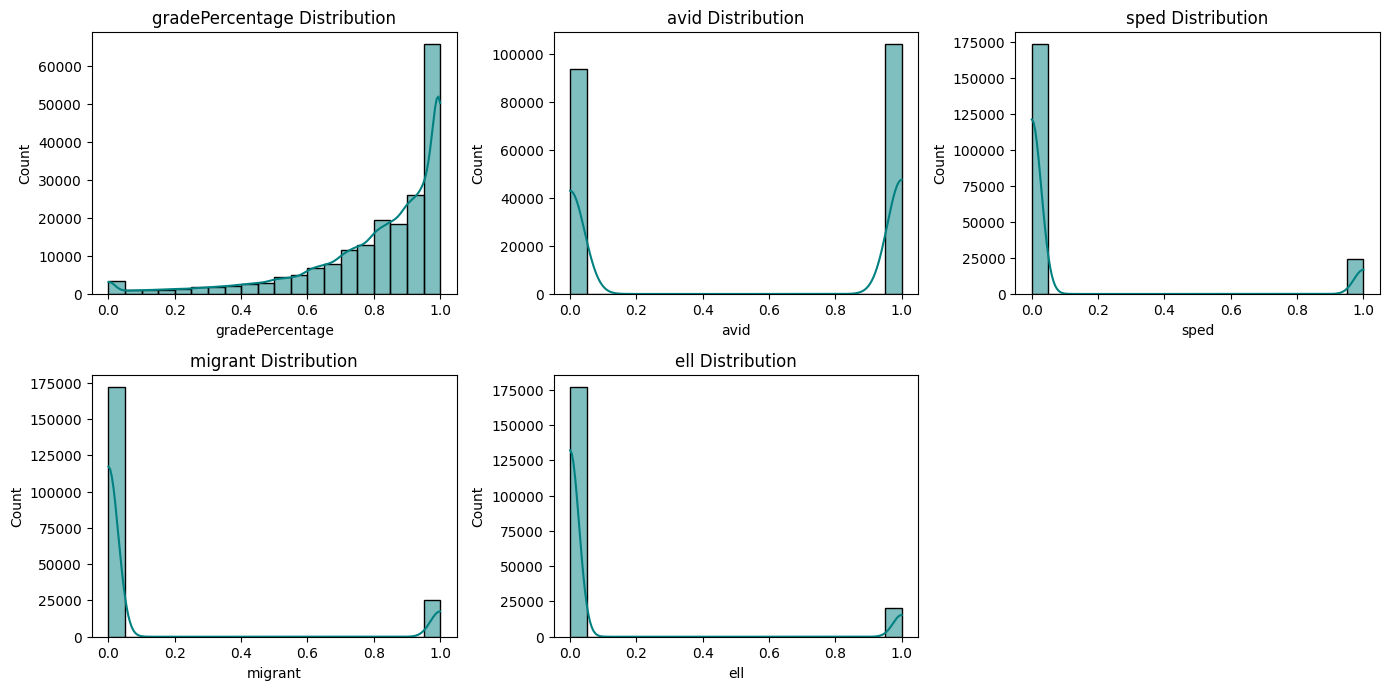

In [11]:
# Histograms for all numeric columns
numeric_columns = cleaned_data.select_dtypes(include=['number'])
plt.figure(figsize=(14, 10))
for i, column in enumerate(numeric_columns.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(numeric_columns[column], kde=True, bins=20, color='teal')
    plt.title(f'{column} Distribution', fontsize=12)
    plt.tight_layout()
plt.show()

<ipython-input-12-888a171db303>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=program, y='gradePercentage', data=cleaned_data, palette='Set2')


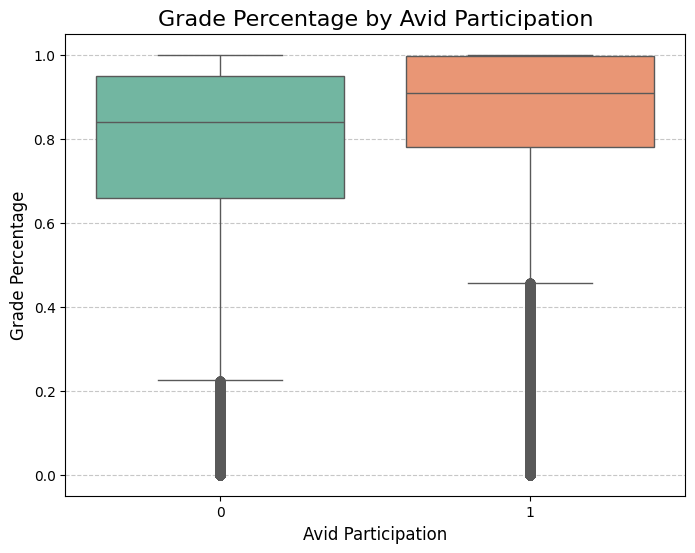

<ipython-input-12-888a171db303>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=program, y='gradePercentage', data=cleaned_data, palette='Set2')


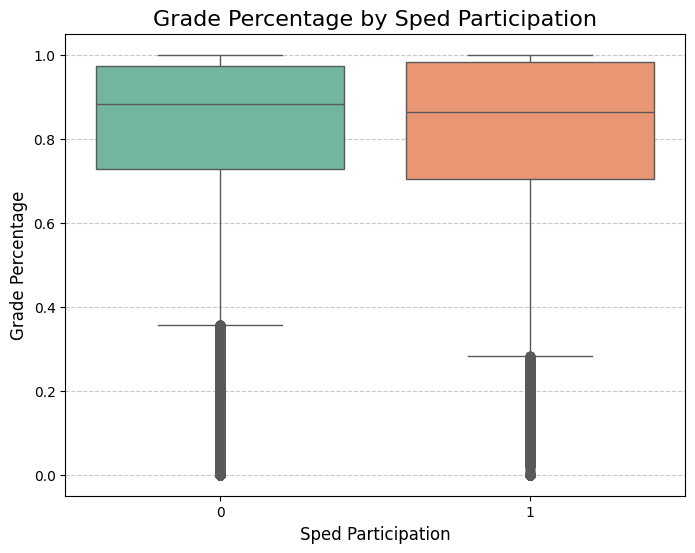

<ipython-input-12-888a171db303>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=program, y='gradePercentage', data=cleaned_data, palette='Set2')


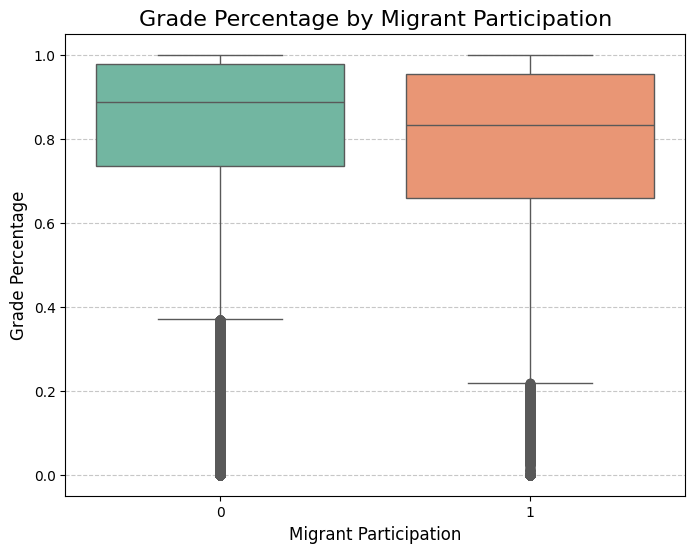

<ipython-input-12-888a171db303>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=program, y='gradePercentage', data=cleaned_data, palette='Set2')


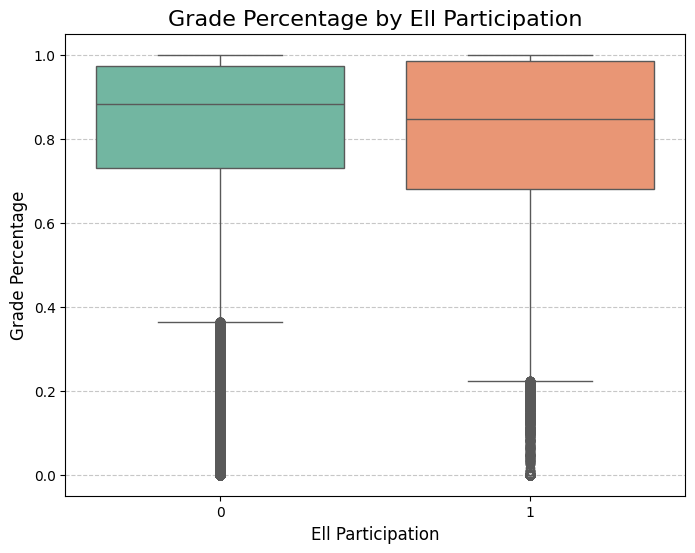

In [12]:
# Boxplots for gradePercentage by program participation
programs = ['avid', 'sped', 'migrant', 'ell']
for program in programs:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=program, y='gradePercentage', data=cleaned_data, palette='Set2')
    plt.title(f'Grade Percentage by {program.capitalize()} Participation', fontsize=16)
    plt.xlabel(f'{program.capitalize()} Participation', fontsize=12)
    plt.ylabel('Grade Percentage', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [19]:
print(cleaned_data[programs].dtypes)
print(cleaned_data['gradePercentage'].dtypes)


avid       int64
sped       int64
migrant    int64
ell        int64
dtype: object
float64


In [17]:
for program in programs:
    cleaned_data[program] = cleaned_data[program].astype(int)
cleaned_data['gradePercentage'] = pd.to_numeric(cleaned_data['gradePercentage'], errors='coerce')
cleaned_data = cleaned_data.dropna(subset=['gradePercentage'] + programs)


<ipython-input-21-8543dd77673c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Program Combination', y='gradePercentage', data=avg_grades, palette='viridis')


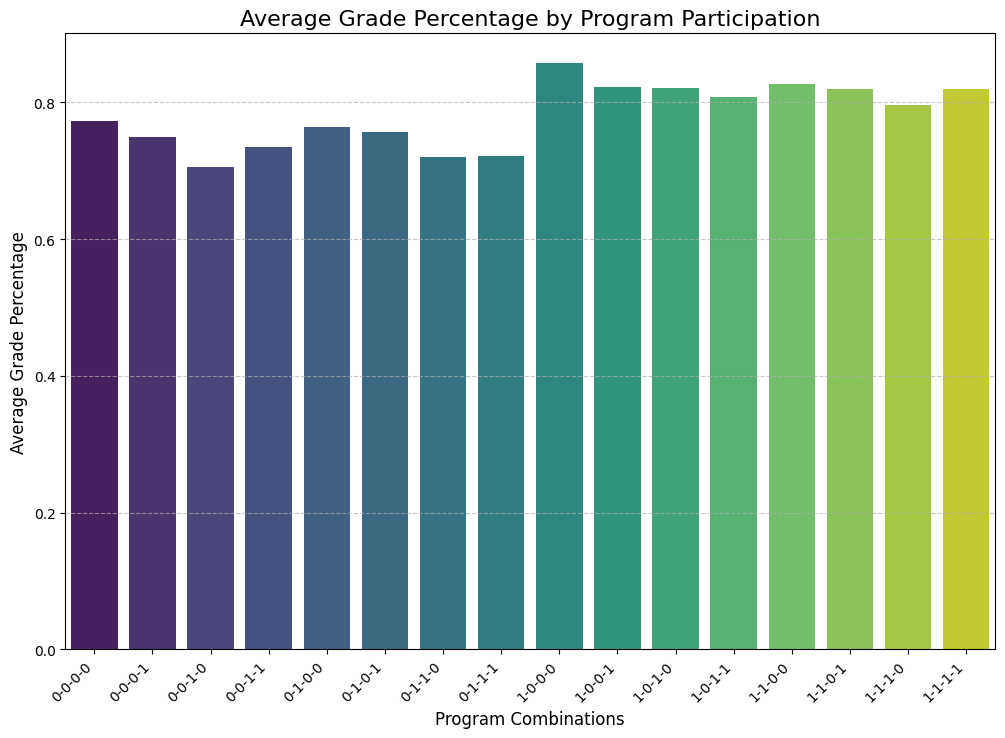

In [21]:
# Calculate mean gradePercentage grouped by programs
avg_grades = cleaned_data.groupby(programs)['gradePercentage'].mean()

# Reset index to flatten the DataFrame
avg_grades = avg_grades.reset_index()

# Combine the program columns into a single column for easier plotting
avg_grades['Program Combination'] = avg_grades[programs].astype(str).agg('-'.join, axis=1)

# Plot grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Program Combination', y='gradePercentage', data=avg_grades, palette='viridis')
plt.title('Average Grade Percentage by Program Participation', fontsize=16)
plt.xlabel('Program Combinations', fontsize=12)
plt.ylabel('Average Grade Percentage', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


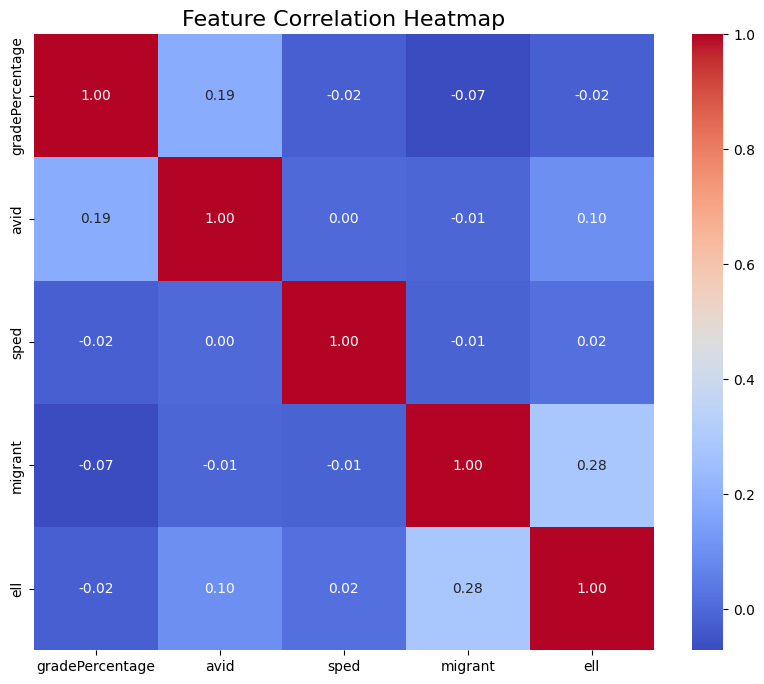

In [16]:
# Correlation Heatmap
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()


In [24]:
# Encode binary columns safely
for col in binary_columns:
    cleaned_data[col] = cleaned_data[col].map({'Y': 1, 'N': 0})


# Check for missing values
missing_counts = cleaned_data.isnull().sum()
if missing_counts.any():
    print("Columns with missing values:")
    print(missing_counts[missing_counts > 0])
    cleaned_data.fillna(0, inplace=True)

# Identify categorical columns for one-hot encoding, excluding gradePercentage and student_ID
categorical_columns = [
    col for col in cleaned_data.columns
    if cleaned_data[col].dtype == 'object' and col not in ['gradePercentage', 'student_ID']
]

# One-hot encode categorical features
encoded_data = pd.get_dummies(cleaned_data, columns=categorical_columns, drop_first=True)

# Verify the columns in encoded_data
print("Columns in encoded_data:")
print(encoded_data.columns)

# Define X (features) and y (target)
X = encoded_data.drop(columns=['gradePercentage', 'student_ID'], errors='ignore')
y = encoded_data['gradePercentage']

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


Columns with missing values:
avid       197741
sped       197741
migrant    197741
ell        197741
dtype: int64
Columns in encoded_data:
Index(['gradePercentage', 'avid', 'sped', 'migrant', 'ell', 'student_ID',
       'schoolyear_2020-2021', 'schoolyear_2021-2022', 'schoolyear_2022-2023',
       'schoolyear_2023-2024', 'schoolyear_2024-2025', 'gradeLevel_02',
       'gradeLevel_03', 'gradeLevel_04', 'gradeLevel_05', 'gradeLevel_06',
       'gradeLevel_07', 'gradeLevel_08', 'gradeLevel_KG', 'gradeLevel_UE',
       'classPeriod_1', 'classPeriod_2', 'classPeriod_3', 'classPeriod_4',
       'classPeriod_5', 'classPeriod_6', 'classPeriod_7', 'classPeriod_8',
       'classPeriod_9', 'classPeriod_15', 'classPeriod_0', 'classPeriod_1',
       'classPeriod_12', 'classPeriod_13', 'classPeriod_14', 'classPeriod_15',
       'classPeriod_16', 'classPeriod_17', 'classPeriod_18', 'classPeriod_19',
       'classPeriod_2', 'classPeriod_2-17', 'classPeriod_2-22',
       'classPeriod_2-27', 'classPerio

In [ ]:
# Display shapes of the datasets
print("\nDataset Splits:")
print("Training set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", X_test.shape)



Dataset Splits:
Training set: (138418, 85)
Validation set: (29661, 85)
Test set: (29662, 85)


Multi-Layer Perceptron (MLP) is suitable for this task because it can capture complex relationships between the input features and the target variable (grades). It also a very flexible and adaptable model for numerical a predictions like grades.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
4326/4326 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - loss: 0.1261 - mae: 0.1872 - val_loss: 0.0319 - val_mae: 0.1218
Epoch 2/50
4326/4326 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 0.0616 - mae: 0.1195 - val_loss: 0.0276 - val_mae: 0.1077
Epoch 3/50
4326/4326 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 0.0301 - mae: 0.1103 - val_loss: 0.0275 - val_mae: 0.1082
Epoch 4/50
4326/4326 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.0326 - mae: 0.1106 - val_loss: 0.0274 - val_mae: 0.1087
Epoch 5/50
4326/4326 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 0.0278 - mae: 0.1081 - val_loss: 0.0270 - val_mae: 0.1058
Epoch 6/50
4326/4326 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 0.0277 - mae: 0.1080 - val_loss: 0.0274 - val_mae: 0.1075
Epoch 7/50
4326/4326 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.0276 - mae: 0.1079 - val_loss: 0.0269 - val_mae: 0.1073
Epoch 8/50
4326/4326 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.0276 - mae: 0.1080 - val_loss: 0.0269 - val_mae: 0.1061
Epoch 9/50
4326/4326 ━━━━━━━━━━━

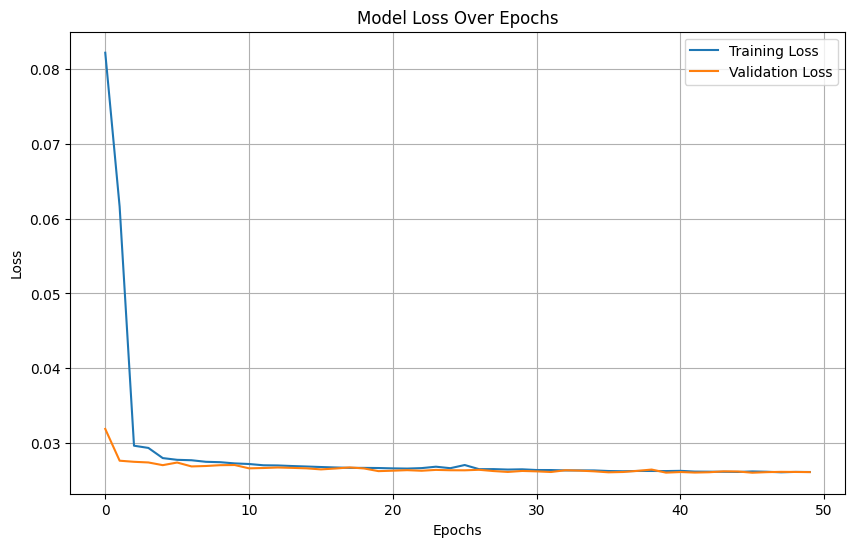

In [25]:
# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model with early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

# Visualize training results
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [26]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss (MSE): {test_loss}")
print(f"Test MAE: {test_mae}")

927/927 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0258 - mae: 0.1041
Test Loss (MSE): 0.026200132444500923
Test MAE: 0.1051139160990715


In [27]:
# Predict on the test set and calculate additional metrics
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mse ** 0.5
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

927/927 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Mean Squared Error: 0.026200152926925232
Root Mean Squared Error: 0.16186461295454677
R^2 Score: 0.4822144241255367


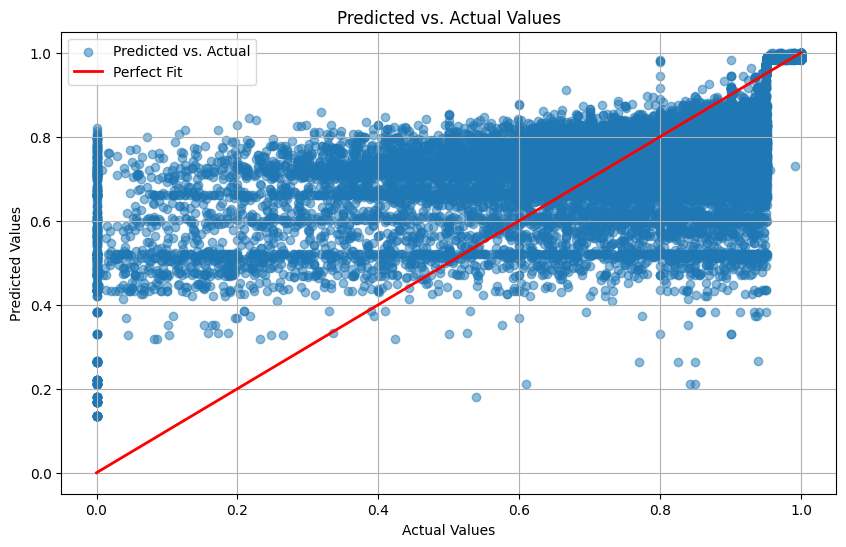

In [28]:
# Plot predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Fit')
plt.title("Predicted vs. Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid()
plt.show()

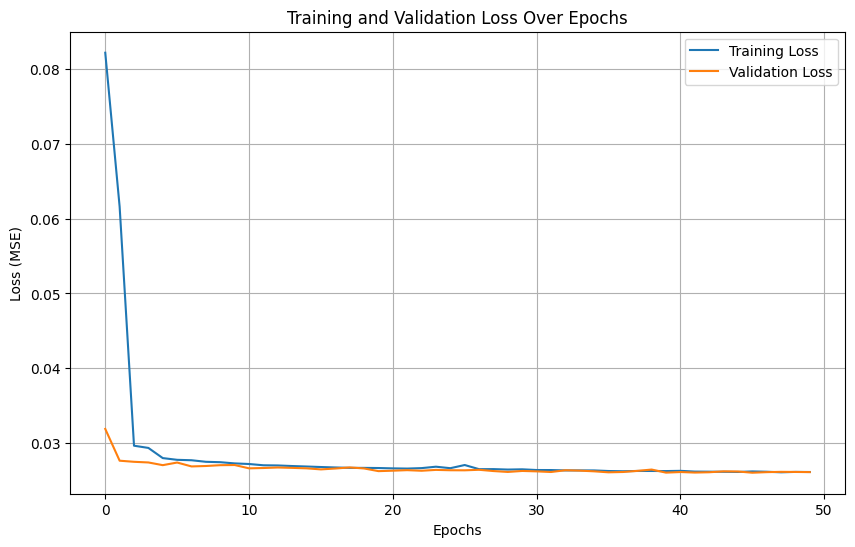

In [29]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid()
plt.show()

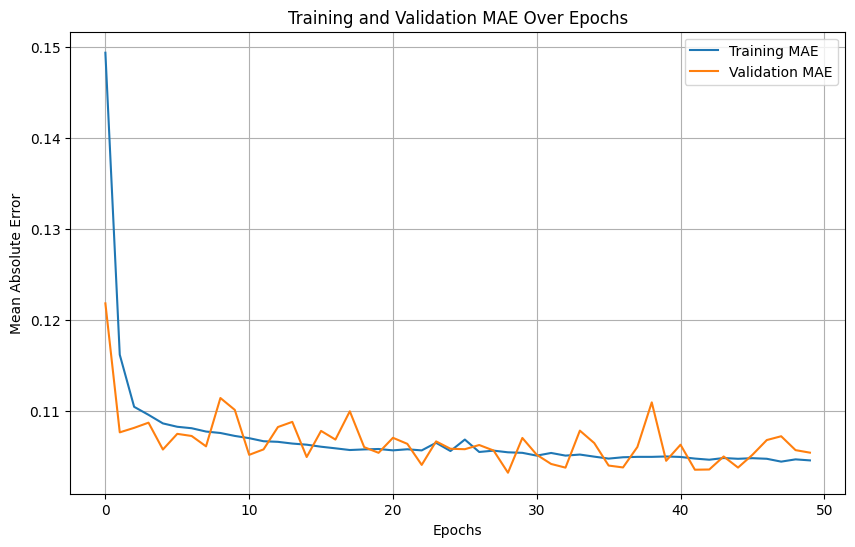

In [30]:
# Plot training and validation MAE if tracked
if 'mae' in history.history and 'val_mae' in history.history:
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('Training and Validation MAE Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Absolute Error')
    plt.legend()
    plt.grid()
    plt.show()